In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [17]:
df = pd.read_csv(r"D:\My Files\IT Vedant\7Applied Data Analysis with Python\Capstone Project\cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [19]:
df.shape

(205, 15)

# Data Cleaning & Preprocessing

In [20]:
missing_values = ['?', 'NA', 'N/A', 'null', 'NULL', 'None', '', ' ']
df.isin(missing_values).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [21]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
128     6
104     6
134     6
74      5
103     5
168     5
95      5
102     5
94      5
65      5
85      5
93      4
106     4
118     4
122     4
148     4
154     3
83      3
125     3
115     3
137     3
101     3
194     2
197     2
188     2
164     2
158     2
192     2
110     2
145     2
113     2
81      2
89      2
87      2
108     2
119     2
153     2
129     2
98      1
121     1
107     1
78      1
231     1
142     1
77      1
186     1
90      1
256     1
Name: count, dtype: int64

In [22]:
df['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
114     6
62      6
101     6
160     6
102     5
76      5
97      5
82      5
145     5
84      5
123     4
86      4
92      4
111     4
121     3
90      3
182     3
85      3
73      3
152     3
207     3
112     2
56      2
156     2
161     2
52      2
162     2
?       2
155     2
100     2
94      2
184     2
176     2
115     1
154     1
140     1
48      1
120     1
64      1
135     1
262     1
78      1
60      1
58      1
55      1
288     1
143     1
142     1
200     1
175     1
72      1
134     1
106     1
Name: count, dtype: int64

In [23]:
cols = ['normalized-losses', 'horsepower']
df[cols] = df[cols].replace('?', np.nan)
df[cols] = df[cols].astype(float)
df[cols] = df[cols].fillna(df[cols].mean())

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [26]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [27]:
print(num_cols)
print(cat_cols)

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')


In [28]:
df[num_cols].corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.232919,-0.541038,-0.105790,0.071389,-0.035823,0.034606,-0.085781
normalized-losses,0.465190,1.000000,0.084195,-0.370706,0.110997,0.203434,-0.218749,-0.178221,0.133424
width,-0.232919,0.084195,1.000000,0.279210,0.735433,0.642195,-0.642704,-0.677218,0.718253
height,-0.541038,-0.370706,0.279210,1.000000,0.067149,-0.110137,-0.048640,-0.107358,0.132444
engine-size,-0.105790,0.110997,0.735433,0.067149,1.000000,0.810713,-0.653658,-0.677470,0.852995
horsepower,0.071389,0.203434,0.642195,-0.110137,0.810713,1.000000,-0.803162,-0.770903,0.746589
city-mpg,-0.035823,-0.218749,-0.642704,-0.048640,-0.653658,-0.803162,1.000000,0.971337,-0.654611
highway-mpg,0.034606,-0.178221,-0.677218,-0.107358,-0.677470,-0.770903,0.971337,1.000000,-0.679048
price,-0.085781,0.133424,0.718253,0.132444,0.852995,0.746589,-0.654611,-0.679048,1.000000


In [29]:
df[num_cols].skew()

symboling            0.211072
normalized-losses    0.854802
width                0.904003
height               0.063123
engine-size          1.947655
horsepower           1.397763
city-mpg             0.663704
highway-mpg          0.539997
price                1.805173
dtype: float64

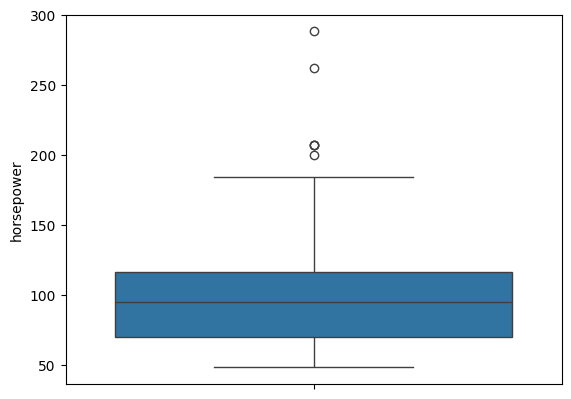

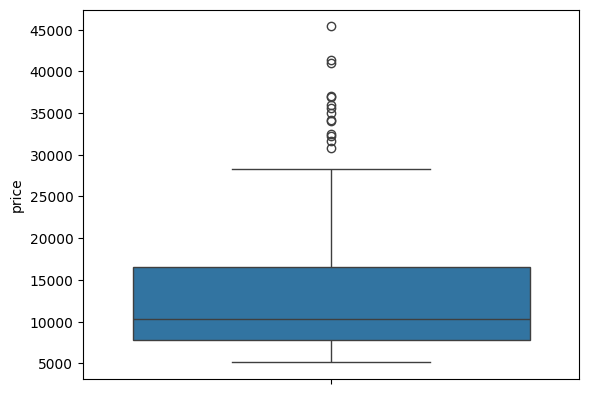

In [30]:
sns.boxplot(df['horsepower'])
plt.show()

sns.boxplot(df['price'])
plt.show()

In [31]:
cols_iqr = ['horsepower', 'price']
for col in cols_iqr:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df = df[(df[col] >= lower) & (df[col] <= upper)]

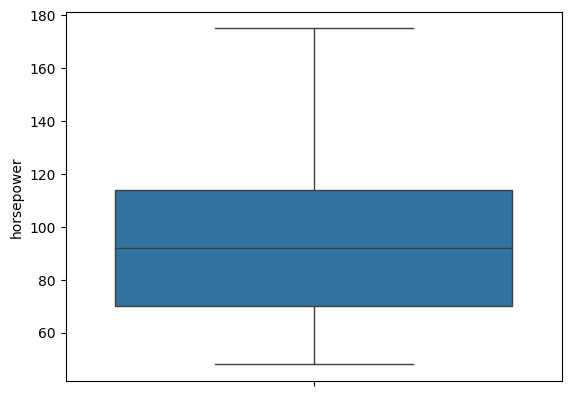

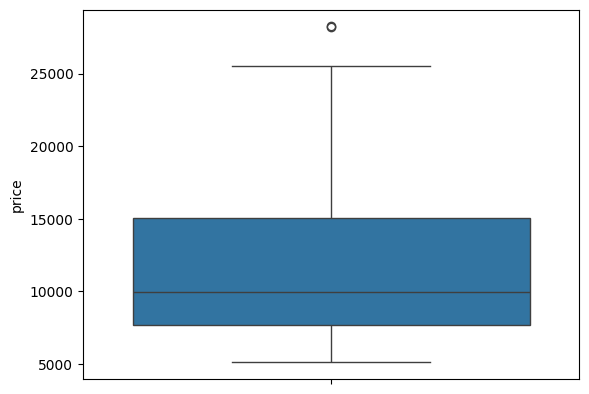

In [32]:
sns.boxplot(df['horsepower'])
plt.show()

sns.boxplot(df['price'])
plt.show()

# Key Analysis & Visualizations

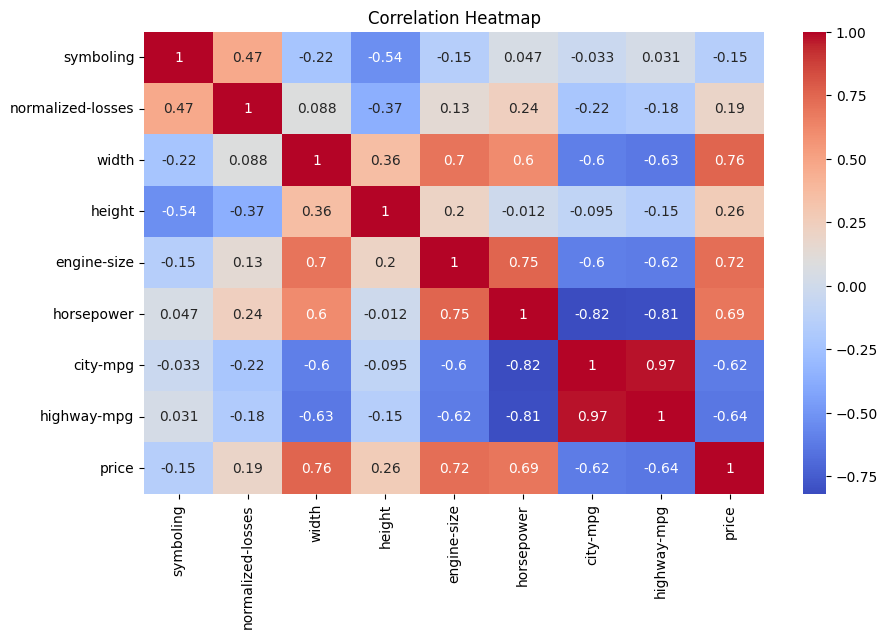

In [33]:
# A. Vehicle Pricing Trends
# Q1. What are the major factors influencing vehicle price?
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# Larger, more powerful cars cost more but give lower mileage.

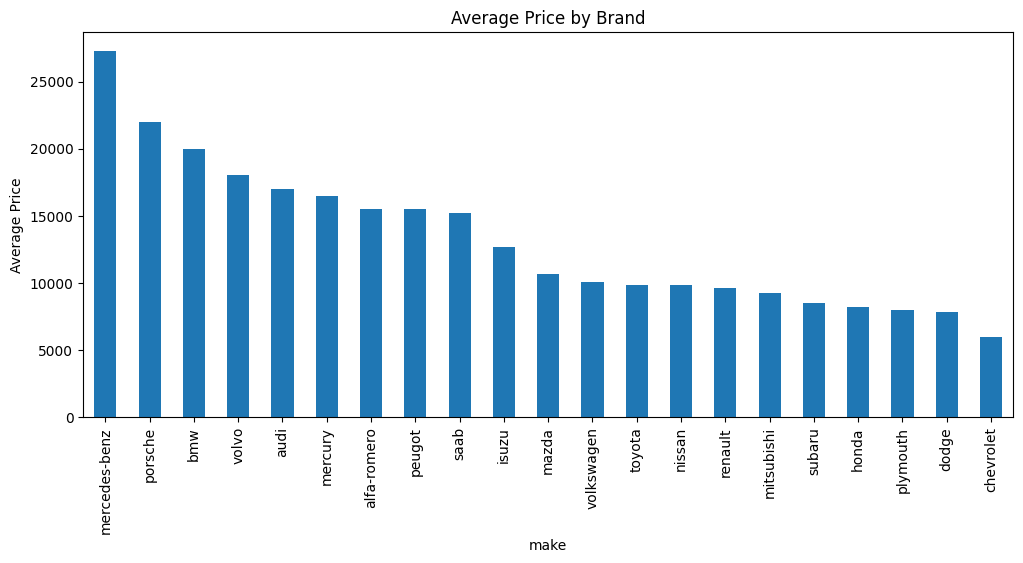

In [34]:
# Q2. How does brand reputation correlate with pricing?
plt.figure(figsize=(12,5))
df.groupby('make')['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Price by Brand")
plt.ylabel("Average Price")
plt.show()
# Premium brands (BMW, Mercedes, Porsche) have higher average prices
# Economy brands (Toyota, Honda, Chevrolet) are lower priced

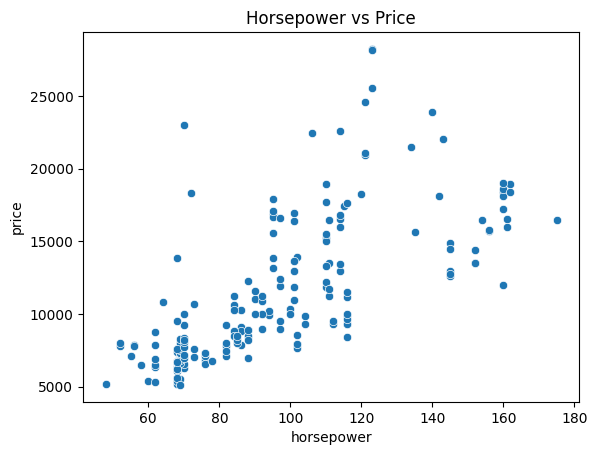

In [35]:
# B. Engine & Performance Insights
# Q1. Do larger engines and higher horsepower lead to higher prices?
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title("Horsepower vs Price")
plt.show()

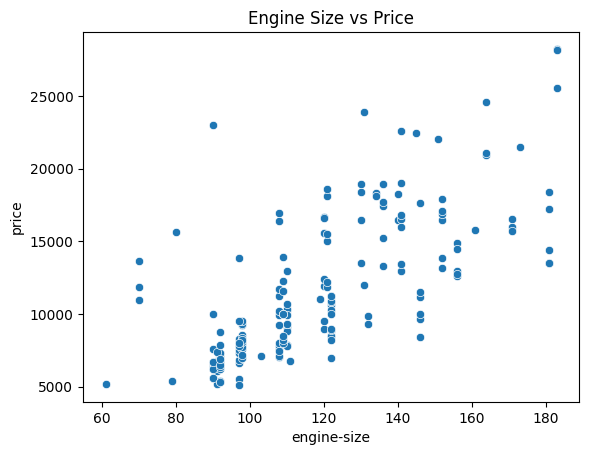

In [36]:
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title("Engine Size vs Price")
plt.show()
# As engine size and horsepower increase, price also increases
# Confirms a strong linear trend

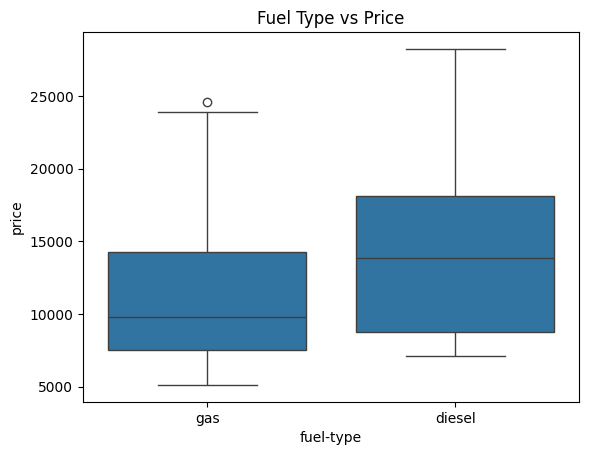

In [37]:
# Q2. How do fuel types affect performance and cost?
sns.boxplot(x='fuel-type', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.show()
# Diesel vehicles generally have higher median prices
# Gas vehicles show wider price distribution

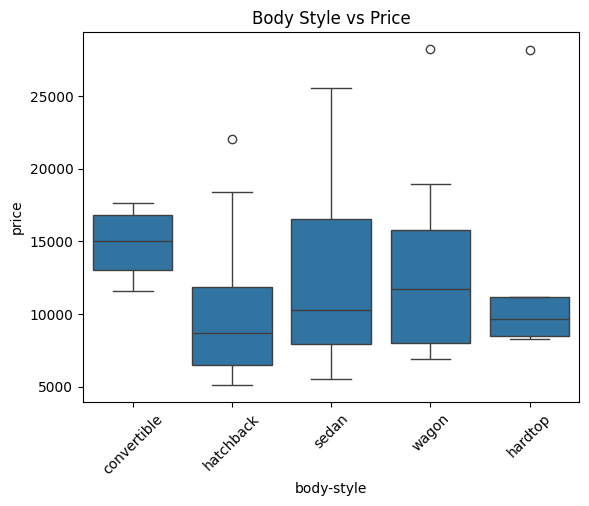

In [38]:
# C. Design & Drive Style Analysis
# Q1. Are certain body styles more expensive?
sns.boxplot(x='body-style', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Body Style vs Price")
plt.show()
# Sedans and wagons tend to be more expensive than hatchbacks

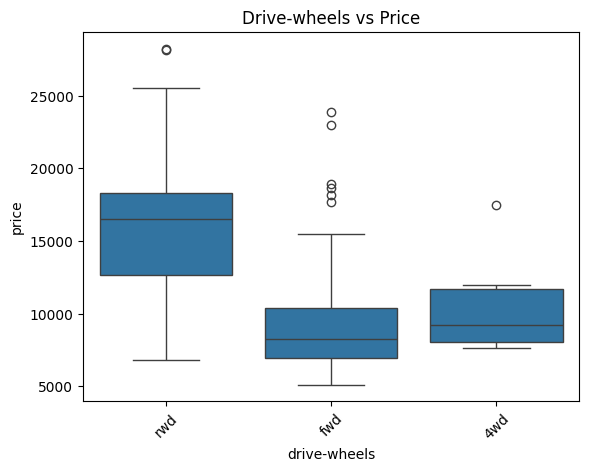

In [39]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Drive-wheels vs Price")
plt.show()

In [40]:
# Q2. Impact of vehicle dimensions on price
df['Area']=df['width']*df['height']

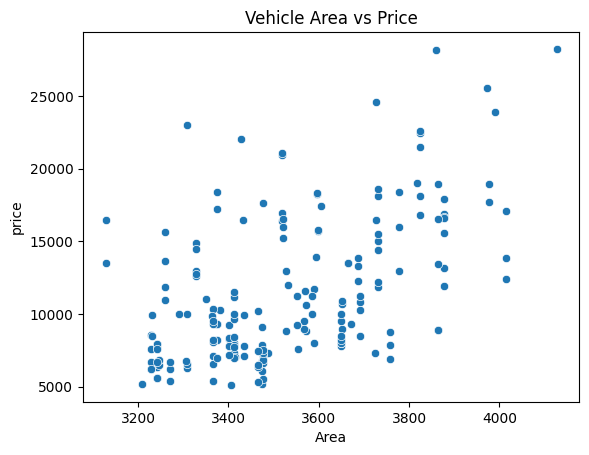

In [41]:
sns.scatterplot(x='Area', y='price', data=df)
plt.title("Vehicle Area vs Price")
plt.show()
# Larger vehicle dimensions → higher price